 **Sulaiman Kagumire 2100702296 2021/HD05/2296U**

In [2]:
import cv2
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from PIL import Image

# 1. Image Filtering

## a) Performance Assessment
For performance assessment, there is always a need to change colored images to grayscale images. The main reasons why grayscale representations are often used instead of operating on color images directly is that grayscale simplifies the algorithm, reduces computational requirements, and easy to visualize.  

## i.  Average Filter
Average filter is a low pass filter that removes spatial frequency noise from an image by reducing amount of intesnsity variation between one pixel and the next. The idea for average or mean filter is to replace each pixel value in an image with the mean value of its neighbors, including itself. This eliminates pixel values which are unrepresentative of their surroundings. 
- Although the noise is less apparent after mean filtering with a 3x3-kernel , the image has been softened or blurred and has lost high frequency detail

##### Varying kernel to 7x7
As seen from plot below, a 7x7 kernel or window filters out more noise and significantly smoothes the image than a 3x3 window. 

However a 7x7 kernel blurs out more edges than a 3x3.

In [3]:
image = cv2.imread('images/frame18760.jpg',0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

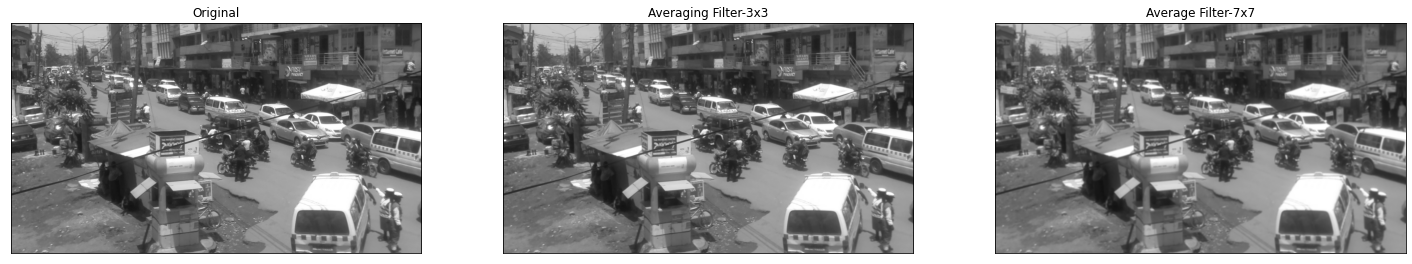

In [4]:
avg3 = cv2.blur(image,(3,3))
avg7 = cv2.blur(image, (7,7))

plt.gcf().set_size_inches(25,25)
plt.subplot(131),plt.imshow(image),plt.title('Original');
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(avg3),plt.title('Averaging Filter-3x3')
plt.xticks([]), plt.yticks([]);
plt.subplot(133),plt.imshow(avg7),plt.title('Average Filter-7x7')
plt.xticks([]), plt.yticks([]);

## ii. Median Filter
Like the Mean filter, this filter considers each pixel in the image in turn and looks at its nearby neighbors to decide whether or not it is representative of its surroundings. However, instead of simply replacing the pixel value with the mean of neighboring pixel values, it replaces it with the median of those values.

This type of filter is used for removing noise, and works best with images suffering from static or salt and pepper noise. One benefit of the median filter is that it retains the edges of an image.
We can introduce salt and pepper noise in an image as show below.
###### Varying kernel to 7x7
A 7x7 window in median filters, as shown below, remove almost all the introduced salt and pepper noise as compared to a 3x3. In 3x3, there is some little remaining noise on the boundary of the image. However, 7x7 window did not preserve edges in the  images



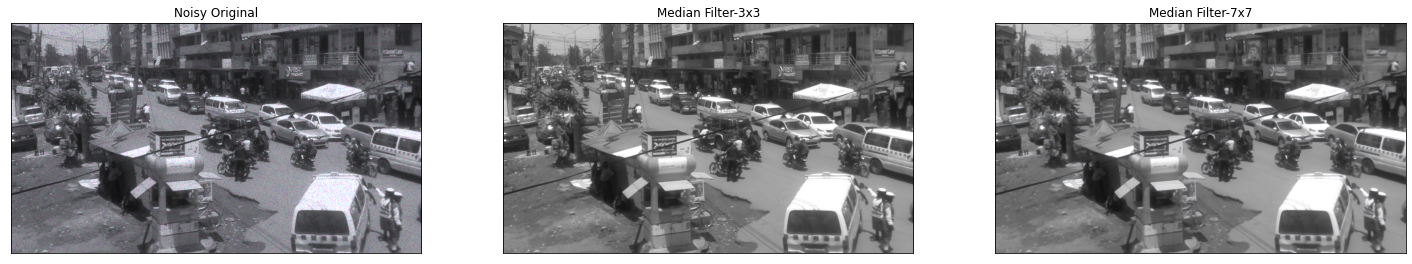

In [5]:
def noisy(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    out[tuple(coords)] = 1
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
    out[tuple(coords)] = 0
    return out

noisy_img = noisy(image);
median3 = cv2.medianBlur(image,3);
median7 = cv2.medianBlur(noisy_img, 7)
plt.gcf().set_size_inches(25,25)
plt.subplot(131),plt.imshow(noisy_img),plt.title('Noisy Original');
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(median3),plt.title('Median Filter-3x3')
plt.xticks([]), plt.yticks([]);
plt.subplot(133),plt.imshow(median7),plt.title('Median Filter-7x7')
plt.xticks([]), plt.yticks([]);

## iii. Gaussian Filter
Gaussian filter is similar to the Mean filter. However, it uses a kernel that represents the shape of a Gaussian or bell-shaped hump. In contrast to the Mean filter’s uniformly weighted average, the Gaussian filter outputs a weighted average of each pixel’s neighborhood, with the average weighted more towards the value of the central pixels. 

#### Varying kernel to 7x7 and α to 5
from the ouput below, the high value of α=5 significantly blurs the image with a kernel of 7x7. This makes the image lose it edges and shape.

Because of this, the Gaussian filter provides gentler smoothing and preserves edges better than a similarly sized Mean filter.


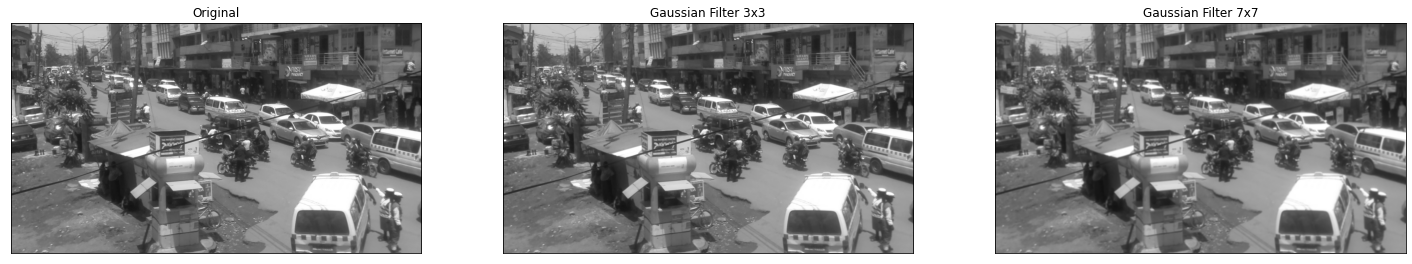

In [6]:
gb3 = cv2.GaussianBlur(image, (3,3), 1,1)

gb7 = cv2.GaussianBlur(image, (7,7), 5,5 )
plt.gcf().set_size_inches(25,25)
plt.subplot(131),plt.imshow(image),plt.title('Original');
plt.xticks([]), plt.yticks([]);
plt.subplot(132),plt.imshow(gb3),plt.title('Gaussian Filter 3x3')
plt.xticks([]), plt.yticks([]);
plt.subplot(133),plt.imshow(gb7),plt.title('Gaussian Filter 7x7')
plt.xticks([]), plt.yticks([]);

## Comparing and contrasting the performance
### Gaussian vs Median Filter
In presence of salt and pepper noise, Gaussian and Mean filters do not do so well better than average filters. Gaussian filter has over a median filter is that it's faster because multiplying and adding is probably faster than sorting in mean filters. Gaussian filters also preserve more edges than average and mean filters.

# 2. Edge Detection

## Sobel edge detector
The Sobel edge detector or operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image. Pixels that have high magnitude form an edge.

It is an approximated 3x3 gradient operator, or kernel, which is convolved with the original image. The kernel is different for both the X and Y directions. The image is processed in the X and Y directions separately, using the X and Y gradient matrix first, and then combined together to form a new image which represents the sum of the X and Y edges of the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


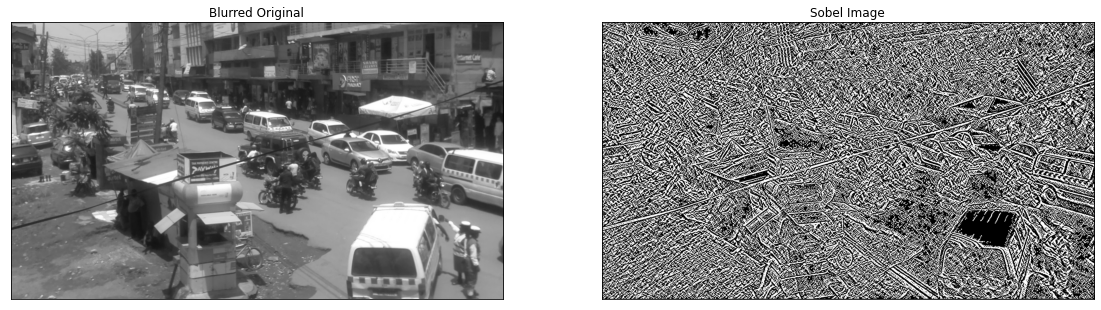

In [7]:
# Read image
image = cv2.imread('images/frame18760.jpg',0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(image,(3,3), 1,1)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.gcf().set_size_inches(30,30)
plt.subplot(131),plt.imshow(img_blur),plt.title('Blurred Original');
plt.xticks([]), plt.yticks([]);
plt.subplot(132),plt.imshow(sobelxy),plt.title('Sobel Image')
plt.xticks([]), plt.yticks([]);

### pros 
- It detects both horizontal and vertical edges from an image
- 
### cons
- The edges are rough and not clear
- Not suitable for complex images

### Robert edge detector
This detector performs a simple, quick to compute, 2-D spatial gradient measurement on an image. It thus highlights regions of high spatial frequency which often correspond to edges. In its most common usage, the input to the operator is a grayscale image, as is the output. Pixel values at each point in the output represent the estimated absolute magnitude of the spatial gradient of the input image at that point.



In [8]:
from scipy import ndimage

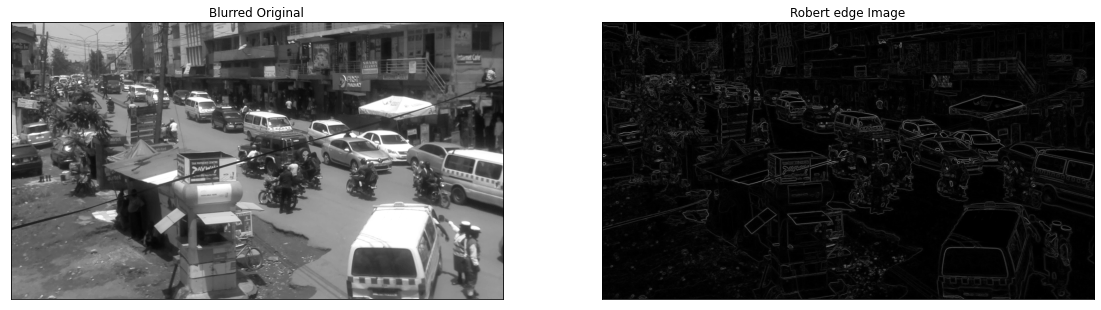

In [9]:
imagerob = cv2.imread('images/frame18760.jpg',0).astype('float64')
# imagerob = cv2.GaussianBlur(imagerob,(3,3), 1,1)

kernelx = np.array([[1,0],[0,-1]])
kernely = np.array([[0,1],[-1,0]])
vertical = ndimage.convolve( imagerob, kernelx )
horizontal = ndimage.convolve( imagerob, kernely )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

plt.gcf().set_size_inches(30,30)
plt.subplot(131),plt.imshow(imagerob, cmap=plt.get_cmap('gray')),plt.title('Blurred Original');
plt.xticks([]), plt.yticks([]);
plt.subplot(132),plt.imshow(edged_img, cmap=plt.get_cmap('gray')),plt.title('Robert edge Image')
plt.xticks([]), plt.yticks([]);


### pros 
- It is fast because only four input pixels need to be examined to determine the value of each output pixel, and only subtractions and additions are used in the calculation. 
### cons
- Since it uses such a small kernel, it is very sensitive to noise
- It produces weak responses to genuine edges unless they are very sharp


### Prewit edge detector
The Prewitt Edge detector is use to detect edges based applying a horizontal and verticle filter in sequence. Both filters are applied to the image and summed to form the final result. The two filters are basic convolution filters of the form:[ [1,1,1],[0,0,0],[-1,-1, -1]] and [[-1,0,1],[-1,0,1],[-1,0,1]].

In [10]:
image = cv2.imread('images/frame18760.jpg', flags=0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Blur the image for better edge detection
img_gaussian = cv2.GaussianBlur(image,(3,3), 1,1)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

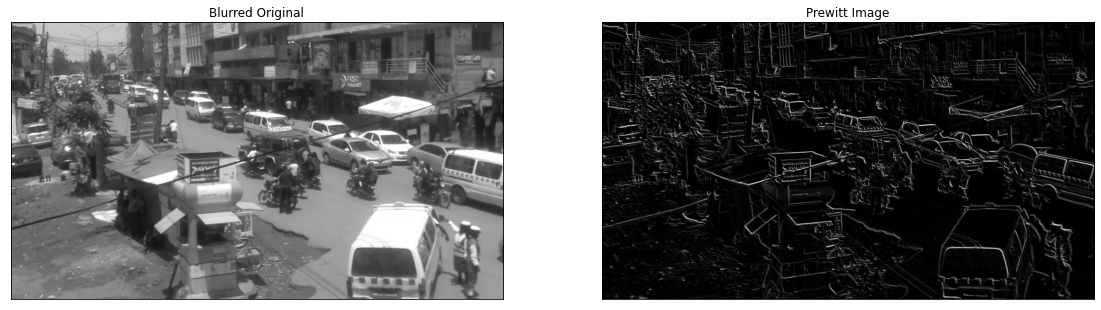

In [11]:
plt.gcf().set_size_inches(30,30)

plt.subplot(131),plt.imshow(img_gaussian),plt.title('Blurred Original');
plt.xticks([]), plt.yticks([]);
plt.subplot(132),plt.imshow(img_prewitt),plt.title('Prewitt Image')
plt.xticks([]), plt.yticks([]);

### pros 
- Unlikely sobel, the edges are clear and smooth.
### cons
- It does not find all edges like Sobel
- It does not place any emphasis on the pixels that are closer to the center of the mask